<a href="https://colab.research.google.com/github/BogereMark879/Bogere-mark/blob/main/Diabets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/diabetes.csv')

In [ ]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
dataset.shape

(768, 9)

In [ ]:
dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
class_counts = dataset.groupby('Outcome').size()
print(class_counts)

Outcome
0    500
1    268
dtype: int64


In [ ]:
from pandas import set_option
set_option('display.width', 100)
set_option('precision', 3)
correlation = dataset.corr(method='pearson')
print(correlation)

                          Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
Pregnancies                     1.000    0.129          0.141         -0.082   -0.074  0.018   
Glucose                         0.129    1.000          0.153          0.057    0.331  0.221   
BloodPressure                   0.141    0.153          1.000          0.207    0.089  0.282   
SkinThickness                  -0.082    0.057          0.207          1.000    0.437  0.393   
Insulin                        -0.074    0.331          0.089          0.437    1.000  0.198   
BMI                             0.018    0.221          0.282          0.393    0.198  1.000   
DiabetesPedigreeFunction       -0.034    0.137          0.041          0.184    0.185  0.141   
Age                             0.544    0.264          0.240         -0.114   -0.042  0.036   
Outcome                         0.222    0.467          0.065          0.075    0.131  0.293   

                          DiabetesPedig

In [ ]:
skew =dataset.skew()
print(skew)


Pregnancies                 0.902
Glucose                     0.174
BloodPressure              -1.844
SkinThickness               0.109
Insulin                     2.272
BMI                        -0.429
DiabetesPedigreeFunction    1.920
Age                         1.130
Outcome                     0.635
dtype: float64


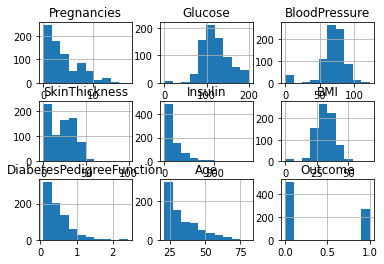

In [ ]:
dataset.hist()
pyplot.show()

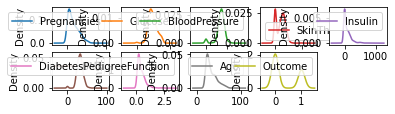

In [ ]:
dataset.plot(kind='density', subplots=True, layout=(5,5), sharex =False)
pyplot.show()

<Figure size 2160x2160 with 0 Axes>

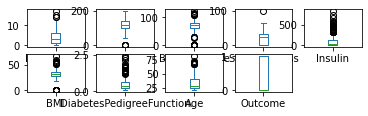

In [ ]:
pyplot.figure(figsize=(30,30))
dataset.plot(kind='box', subplots= True, layout=(5,5), sharex=False)
pyplot.show()

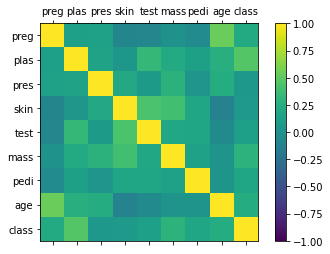

In [ ]:
#correlation matrix plot
correlation = dataset.corr()
#plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, 9, 1)
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

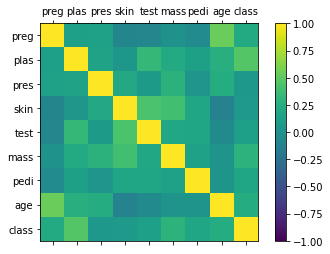

In [ ]:
#plotting scatterplot matrix
correlation = dataset.corr()
#plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

# Pre-processing Machine Learning Datasets

In [ ]:
array = dataset.values
x = array[:,0:8]
y = array[:, 8]
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x,y)
set_printoptions(precision=3)
print(fit.scores_)

[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]


In [ ]:
feature = fit.transform(x)
print(feature[0:5,:])

[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


2. Standardize dataset

In [ ]:
from sklearn.preprocessing import StandardScaler
array = dataset.values
X = array[:,0:8]
Y = array[:,8]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


3. Normalize datasets

In [ ]:
from sklearn.preprocessing import Normalizer
array = dataset.values
X = array[:,0:8]
Y = array[:,8]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
set_printoptions(precision=3)
print(normalizedX[0:5,:])

[[0.034 0.828 0.403 0.196 0.    0.188 0.004 0.28 ]
 [0.008 0.716 0.556 0.244 0.    0.224 0.003 0.261]
 [0.04  0.924 0.323 0.    0.    0.118 0.003 0.162]
 [0.007 0.588 0.436 0.152 0.622 0.186 0.001 0.139]
 [0.    0.596 0.174 0.152 0.731 0.188 0.01  0.144]]


4. Binarize datasets

In [ ]:
from sklearn.preprocessing import Binarizer
array = dataset.values
X = array[:,0:8]
Y = array[:,8]
binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)
set_printoptions(precision=3)
print(binaryX[0:5,:])

[[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


**Feature Selection for Machine Learning**

**Univariate Selection**

In [ ]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
array = dataset.values
X = array[:,0:8]
Y = array[:,8]
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
print(features[0:5,:])

[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]
[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


 Recursive Feature Elimination 

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print(|"Num Features: %d|" % fit.n_features_)